# TSF - Task 1 : Prediction using Supervised Machine Learning

# Author : Kaustuk Kale

# Importing the required libraries

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Reading the dataset

In [4]:
df=pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")
df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [7]:
df.shape

(25, 2)

In [8]:
#Show basic stats od dataset
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Text(0.5, 1.0, 'Relationship between hours and Scores')

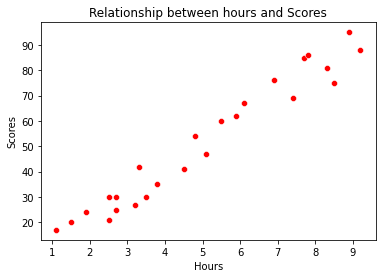

In [55]:
#Data Visualization of Hours and Scores
sns.scatterplot(x=df["Hours"],y=df["Scores"],color="Red")
plt.title("Relationship between hours and Scores")

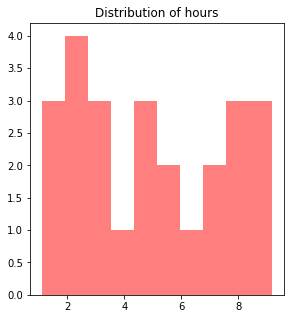

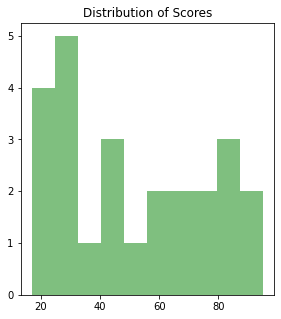

In [23]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.hist(x=df["Hours"],alpha=0.8color="r")
plt.title("Distribution of hours")

plt.figure(figsize=(10,5))
plt.subplot(1,2,2)
plt.hist(x=df["Scores"], alpha=0.5, color="g")
plt.title("Distribution of Scores")

plt.show()

# Prepare the Dataset 

In [29]:
x=df[["Hours"]]
y=df[["Scores"]]

In [30]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)

# Regression Model

In [31]:
from sklearn.linear_model import LinearRegression
Lr=LinearRegression()

In [35]:
Lr.fit(x_train,y_train)
print("Intercept Value: ",Lr.intercept_)
print("Coefficient Value: ",Lr.coef_)

Intercept Value:  [1.06960952]
Coefficient Value:  [[9.97391444]]


# Model Evaluation 

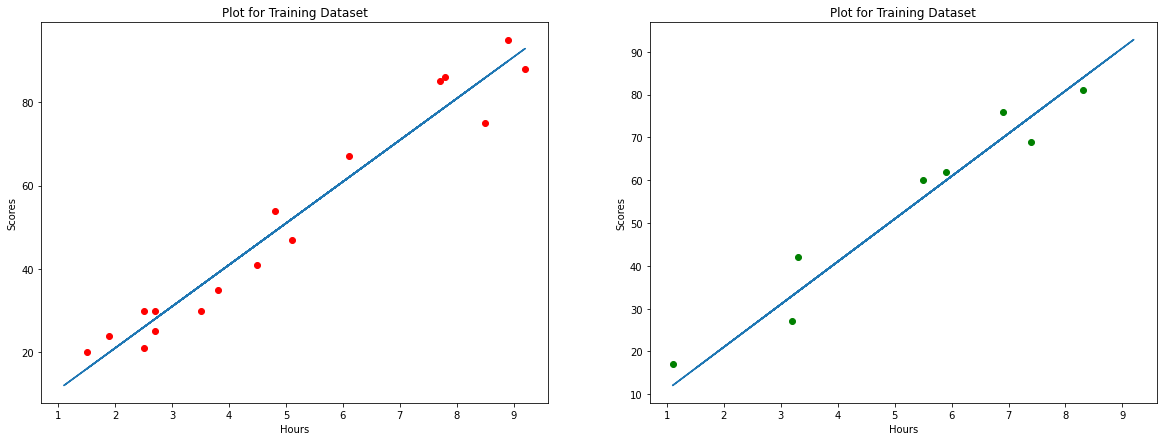

In [40]:
#Best fit Line
line=Lr.coef_* x + Lr.intercept_

plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
plt.plot(x,line)
plt.scatter(x_train,y_train,color="r")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.title("Plot for Training Dataset") 

plt.subplot(1,2,2)
plt.plot(x,line)
plt.scatter(x_test,y_test,color="g")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.title("Plot for Training Dataset") 

plt.show()

In [51]:
#predict the testing data
actual_score=y_test
pred_score=Lr.predict(x_test)
pred_score


array([[33.98352715],
       [32.98613571],
       [69.88961912],
       [83.85309933],
       [12.0409154 ],
       [55.92613891],
       [74.87657634],
       [59.91570468]])

# Model Accuracy

In [54]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

print("Mean absolute error is:" , mean_absolute_error(actual_score,pred_score))
print("Mean Squared error is:",mean_squared_error(actual_score,pred_score))

Mean absolute error is: 4.994988264163021
Mean Squared error is: 28.205236079020302


# Model Performance

In [50]:
predict=Lr.predict([[9.25]])
print("The predcited score if person studies for 9.25 hrs is : ",str(predict)[2:-2])

The predcited score if person studies for 9.25 hrs is :  93.32831804
